In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("E:/postgre/Concrete_Data_Yeh.csv", header = 0)

In [9]:
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


## Initial Investigation

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [11]:
df.corr()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
flyash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseaggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineaggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
csMPa,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [12]:
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Nothing seems out of the ordinary here

## Regression Tree

In [14]:
from sklearn import tree

In [17]:
x = df.loc[:,df.columns!="csMPa"]
type(x)

pandas.core.frame.DataFrame

In [19]:
y = df["csMPa"]

In [20]:
x.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [21]:
y.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: csMPa, dtype: float64

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [23]:
regtree = tree.DecisionTreeRegressor(max_depth=3)

In [24]:
regtree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [25]:
y_train_predict = regtree.predict(x_train)
y_test_predict = regtree.predict(x_test)

In [26]:
y_test_predict

array([35.494     , 16.50344371, 63.55081395, 63.55081395, 16.50344371,
       40.81863636, 63.55081395, 40.81863636, 63.55081395, 45.37180952,
       30.9594958 , 43.33248227, 43.33248227, 16.50344371, 45.37180952,
       63.55081395, 40.81863636, 43.33248227, 35.494     , 30.9594958 ,
       63.55081395, 43.33248227, 16.50344371, 35.494     , 16.50344371,
       30.9594958 , 63.55081395, 16.50344371, 63.55081395, 43.33248227,
       30.9594958 , 45.37180952, 30.9594958 , 30.9594958 , 16.50344371,
       16.50344371, 27.705     , 40.81863636, 30.9594958 , 30.9594958 ,
       27.705     , 45.37180952, 30.9594958 , 30.9594958 , 63.55081395,
       27.705     , 16.50344371, 35.494     , 16.50344371, 43.33248227,
       30.9594958 , 30.9594958 , 30.9594958 , 43.33248227, 43.33248227,
       45.37180952, 30.9594958 , 63.55081395, 63.55081395, 43.33248227,
       45.37180952, 16.50344371, 63.55081395, 40.81863636, 16.50344371,
       30.9594958 , 30.9594958 , 30.9594958 , 30.9594958 , 16.50

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
r2_score(y_test, y_test_predict)

0.5785210309071678

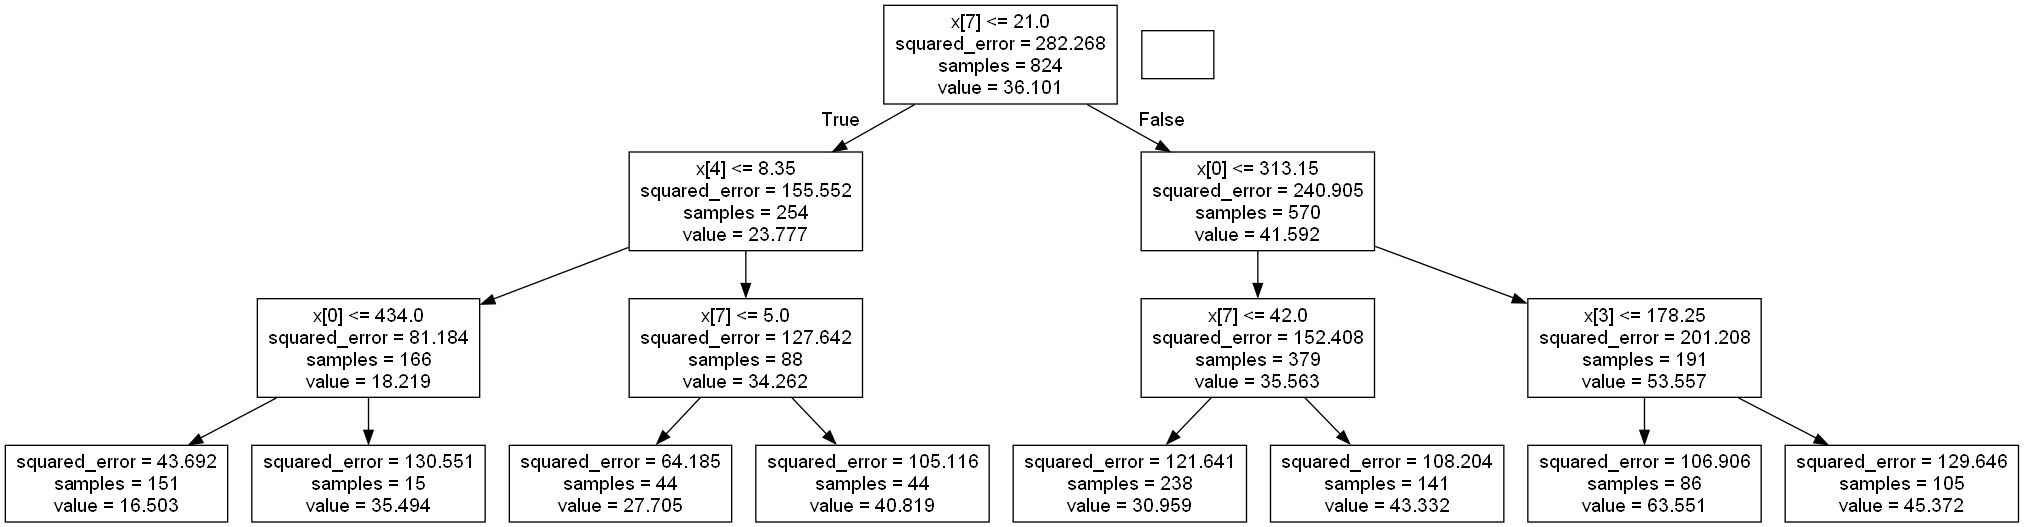

In [30]:
dot_data = tree.export_graphviz(regtree, out_file = None)
from IPython.display import Image
import pydotplus 
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Using Xgboost

In [31]:
import xgboost as xgb

In [33]:
params = {
    'objective': 'reg:squarederror',  
    'n_estimators': 100,            
    'learning_rate': 0.1,            
    'max_depth': 3,                 
    'subsample': 0.8,            
    'colsample_bytree': 0.8,      
    'gamma': 0.1,                    
}

xgb_reg = xgb.XGBRegressor(**params)

In [34]:
xgb_reg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [35]:
y_pred = xgb_reg.predict(x_test)

In [36]:
r2 = r2_score(y_test, y_pred)

In [37]:
r2

0.9015509591092226